In [293]:
import torch 
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np

In [294]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Linear Regression

In [295]:
# data preparation
# y = bias + weight * X

total = 10000
bias = 0.7 
weight = 2.5
X = 10 * torch.rand(total)
y = bias + weight * X

# data split
train_split = int(0.7 * total)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(
    X_train.shape,
    y_train.shape,
    X_test.shape,
    y_test.shape,
    sep='\n'
)

torch.Size([7000])
torch.Size([7000])
torch.Size([3000])
torch.Size([3000])


In [296]:
# data visualization

def plot_predictions(
    train_data = X_train,
    train_label = y_train,
    test_data = X_test,
    test_label = y_test,
    predictions = None
):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_label, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_label, c='r', s=4, label="Test Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=4, label="Predictions")

    plt.legend(prop={"size": 14});

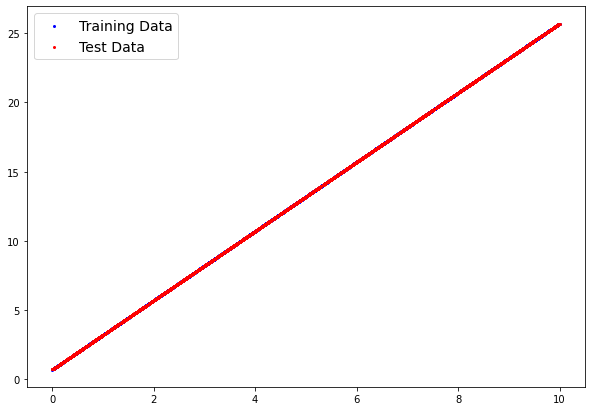

In [297]:
plot_predictions()

# Building Model

In [298]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.bias + self.weight * X

# Train and Test

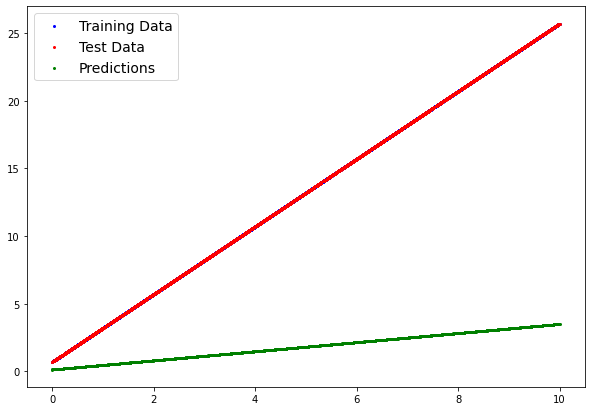

In [299]:
torch.manual_seed(42)
model1 = LinearRegressionModel()

with torch.inference_mode():
    y_preds = model1(X_test)

plot_predictions(predictions=y_preds)

In [300]:
# Loss Function and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(
    params=model1.parameters(),
    lr=0.01 
)

In [301]:
# Training and Testing Loop
# 1. Forward Pass
# 2. Calculate the Loss
# 3. Optimizer Zero Grad
# 4. Perform Backpropagation
# 5. Step the Optimizer

epochs = 50
torch.manual_seed(42)

epoch_list = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    model1.train()
    y_preds = model1(X_train)
    loss = loss_fn(y_preds, y_train)
    train_loss_list.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model1.eval()

    with torch.inference_mode():
        test_pred = model1(X_test)
        test_loss = loss_fn(test_pred, y_test)
        test_loss_list.append(test_loss)

    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} \n \
            Train loss: {loss} \n \
            Test loss: {test_loss}"
        )
    
    epoch_list.append(epoch)

Epoch: 0 
             Train loss: 11.399542808532715 
             Test loss: 11.138554573059082
Epoch: 10 
             Train loss: 8.794083595275879 
             Test loss: 8.53320026397705
Epoch: 20 
             Train loss: 6.188624858856201 
             Test loss: 5.927846908569336
Epoch: 30 
             Train loss: 3.5831665992736816 
             Test loss: 3.322492837905884
Epoch: 40 
             Train loss: 0.977708101272583 
             Test loss: 0.7171391844749451


In [302]:
model1.state_dict()

OrderedDict([('weight', tensor([2.5611])), ('bias', tensor([0.5846]))])

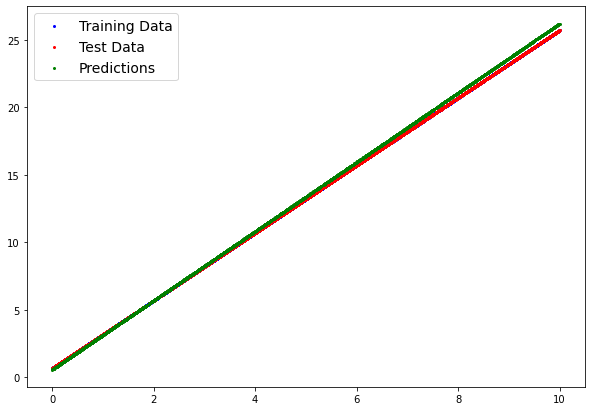

In [303]:
with torch.inference_mode():
        test_pred = model1(X_test)
        
plot_predictions(predictions=test_pred)

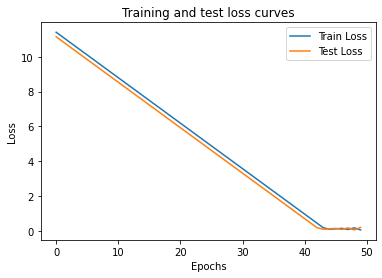

In [304]:
plt.plot(epoch_list, np.array(torch.tensor(train_loss_list).numpy()), label="Train Loss")
plt.plot(epoch_list, np.array(torch.tensor(test_loss_list).numpy()), label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Saving Model

1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

# Putting Everything Together

In [305]:
# data preparation

total = 1000
torch.manual_seed(42)

bias = 8.822
weight = 9.150
X = torch.rand(total).unsqueeze(dim=1)
y = bias + X * weight

In [306]:
# train test split

train_split = int(0.7 * total)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='\n')

torch.Size([700, 1])
torch.Size([700, 1])
torch.Size([300, 1])
torch.Size([300, 1])


In [307]:
# Model Building

class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model2 = LinearRegressionModel2()
model2.to(device)

print(
    list(model2.parameters()), 
    next(model2.parameters()).device,
    sep='\n'
)

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]
cpu


In [308]:
# training

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(
    params = model2.parameters(),
    lr = 0.01
)
epochs = 2500
epoch_list = list()
train_loss_list = list()
test_loss_list = list()

# send data to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model2.train()                      # initiate train mode
    y_pred = model2(X_train)            # forward propagation
    loss = loss_fn(y_pred, y_train)     # calculate loss
    optimizer.zero_grad()               # make gradient zero
    loss.backward()                     # backpropagation 
    optimizer.step()                    # change optimizer
    
    epoch_list.append(epoch)
    train_loss_list.append(loss)
    
    # model evaluation
    model2.eval()                       # turns off gradient mode
    
    with torch.inference_mode():
        test_pred = model2.forward(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
        test_loss_list.append(test_loss)

In [309]:
model2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[8.7751]])),
             ('linear_layer.bias', tensor([9.0177]))])

In [310]:
# make predictions

model2.eval()

with torch.inference_mode():
    y_preds = model2(X_test)
    
print(loss_fn(y_preds, y_test))

tensor(0.0945)


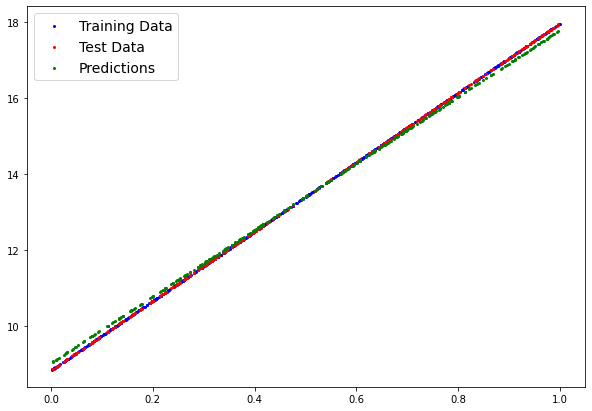

In [311]:
# plot predictions

plot_predictions(
    train_data = X_train,
    train_label = y_train,
    test_data = X_test,
    test_label = y_test,
    predictions = y_preds.cpu()
)

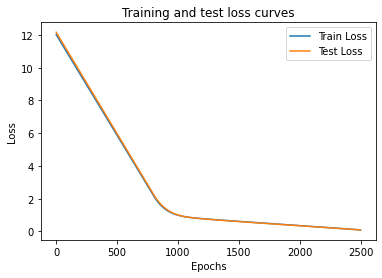

In [312]:
plt.plot(epoch_list, np.array(torch.tensor(train_loss_list).numpy()), label="Train Loss")
plt.plot(epoch_list, np.array(torch.tensor(test_loss_list).numpy()), label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Saving Model

In [313]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(), f=MODEL_SAVE_PATH)

Saving Model to: models/01_pytorch_workflow_model_1.pth


In [314]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [315]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

for val in (y_preds == loaded_model_1_preds).numpy():
    assert val == True, "False Found"